In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_parquet("hf://datasets/emotone-ar-cicling2017/emotone_ar/data/train-00000-of-00001.parquet")
train

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,tweet,label
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1
2,كتنا نيله ف حظنا الهباب xD,3
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0
...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2


In [3]:
train['label'].value_counts()

,count
label,
0,1550
1,1444
2,1281
3,1256
4,1220
7,1207
5,1062
6,1045


In [4]:
X_train = train.drop(columns=['label'])
y_train = train['label']

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
data_resampled, targets_resampled = ros.fit_resample(X_train, y_train)

In [6]:
targets_resampled.value_counts()

,count
label,
0,1550
1,1550
3,1550
2,1550
6,1550
4,1550
5,1550
7,1550


In [7]:
data_resampled

,tweet
0,الاوليمبياد الجايه هكون لسه ف الكليه ..
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...
2,كتنا نيله ف حظنا الهباب xD
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...
...,...
12395,كانت تهرب مما تخاف وتبتعد عنه لابعد مدي ..ثم ت...
12396,خايف عليك وخاطري منك طايب لا بارك الله في تناق...
12397,احس اني بختبر خايفه
12398,خايفهَ عليه من الكدرّ والله اخـاف.


In [8]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
#!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.3 MB/s eta 0:00:00


In [11]:
import re
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
arabic_stopwords = set(stopwords.words("arabic"))

def preprocessor(text):

    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    text = re.sub(r'http\S+|www.\S+', '', text)

    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'\bCC\b', '', text)
    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'#', '', text)

    text = emoji.replace_emoji(text, replace="")

    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    text = re.sub(r'[\d-]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = ' '.join([word for word in text.split() if word not in arabic_stopwords])


    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def tokenizer(text):
    return word_tokenize(text)

In [13]:
X_train = data_resampled['tweet']
y_train = targets_resampled

In [14]:
X_train,y_train

(0                  الاوليمبياد الجايه هكون لسه ف الكليه ..
 1        عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...
 2                               كتنا نيله ف حظنا الهباب xD
 3        جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...
 4        الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...
                                ...                        
 12395    كانت تهرب مما تخاف وتبتعد عنه لابعد مدي ..ثم ت...
 12396    خايف عليك وخاطري منك طايب لا بارك الله في تناق...
 12397                                  احس اني بختبر خايفه
 12398                  خايفهَ عليه من الكدرّ  والله اخـاف.
 12399                                  خايفه من القدرات :(
 Name: tweet, Length: 12400, dtype: object,
 0        0
 1        1
 2        3
 3        2
 4        0
         ..
 12395    7
 12396    7
 12397    7
 12398    7
 12399    7
 Name: label, Length: 12400, dtype: int64)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


svm = Pipeline([('vect', CountVectorizer(tokenizer=tokenizer, preprocessor=preprocessor,
                                         analyzer='word', ngram_range=(1, 2),
                                         min_df=5, lowercase=False)),
                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                ('clf-svm', LinearSVC(loss='hinge', penalty='l2', max_iter=5000))])

model = svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
from sklearn.metrics import f1_score

predictions = model.predict(X_train)
print('Training F1-score:', f1_score(y_train, predictions, average='weighted'))

Training F1-score: 0.8930661078564731


In [25]:
import glob

file_pattern = '/content/test (?).csv'

files = glob.glob(file_pattern)

dataframes = []

for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)

file_pattern = '/content/test (??).csv'

files = glob.glob(file_pattern)

for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)

test = pd.concat(dataframes, ignore_index=True)

test

,ID,Name,Handle,Tweet Text,TweetCreateTime,TweetURL,ReplyCount,QuoteCount,RetweetCount,LikeCount,...,Unnamed: 1,Username,Tweet ID (click to view url),Retweets,Comments,Favorites,Is Retweet?,Date,Tweet Source,Status URL
0,1.839941e+18,إسرائيل بالعربية,@IsraelArabic,جيش الدفاع قضى على المدعو حسن نصرالله زعيم تنظ...,2024-09-28 11:40:35,https://x.com/IsraelArabic/status/183994075471...,47.0,5.0,22.0,216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.839941e+18,ماجد..🇮🇶🇮🇶,@Iraqi__96,@IsraelArabic قد تخلص العالم من ثاني اخطر ارها...,2024-09-28 11:42:36,https://x.com/Iraqi__96/status/183994126340923...,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.839946e+18,Dr.Salem Alketbi د.سالم الكتبي,@drsalemalketbi,@IsraelArabic 📌 تؤكد دولة #إسرائيل ✡️🇮🇱من خلال...,2024-09-28 12:01:27,https://x.com/drsalemalketbi/status/1839946006...,0.0,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.839984e+18,سعود العراقي,@AltwbyS,@IsraelArabic السيد بخير اعلام العدو يربك الوض...,2024-09-28 14:31:23,https://x.com/AltwbyS/status/1839983740283388155,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.839999e+18,ياسر محمد احمد,@yasser00753537,@IsraelArabic اين الجثمان,2024-09-28 15:32:13,https://x.com/yasser00753537/status/1839999049...,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,NaN,Salahdz33865432,NaN,@GKordahi جورج قرداحي إنسان حر، ليس مثل الحيوا...,NaN,NaN,NaN,NaN,NaN,NaN,...,Salah,https://www.twitter.com/Salahdz33865432,1.841471e+18,0.0,0.0,0.0,NaN,2024-10-02 13:33:08,Twitter for Android,https://www.twitter.com/Salahdz33865432/status...
2958,NaN,bluejasmine_MCT,NaN,@GKordahi نعم استاذ جورج.. راح الظهر والسند ال...,NaN,NaN,NaN,NaN,NaN,NaN,...,Jasmine,https://www.twitter.com/bluejasmine_MCT,1.842644e+18,0.0,0.0,0.0,NaN,2024-10-05 19:12:18,Twitter for iPhone,https://www.twitter.com/bluejasmine_MCT/status...
2959,NaN,PXlaA6kY1u0Evuz,NaN,@GKordahi خلفَ ورائه رجالاً اشداء اوفياء سيحمو...,NaN,NaN,NaN,NaN,NaN,NaN,...,امل,https://www.twitter.com/PXlaA6kY1u0Evuz,1.842740e+18,0.0,0.0,0.0,NaN,2024-10-06 01:35:05,Twitter for iPhone,https://www.twitter.com/PXlaA6kY1u0Evuz/status...
2960,NaN,Hhilal23761039,NaN,@GKordahi واطي,NaN,NaN,NaN,NaN,NaN,NaN,...,H_ Hilal,https://www.twitter.com/Hhilal23761039,1.842748e+18,0.0,0.0,0.0,NaN,2024-10-06 02:04:13,Twitter for iPhone,https://www.twitter.com/Hhilal23761039/status/...


In [26]:
import re

def clean_comments(comment):
    comment = re.sub(r'@\w+', '', comment)
    comment = re.sub(r'http[s]?://\S+', '', comment)
    if comment == ' ':
      return np.nan
    return comment.strip()

test = test['Tweet Text'].apply(clean_comments)
test = test.dropna()
test

,Tweet Text
0,جيش الدفاع قضى على المدعو حسن نصرالله زعيم تنظ...
1,قد تخلص العالم من ثاني اخطر ارهابي بعد قاسم سل...
2,📌 تؤكد دولة #إسرائيل ✡️🇮🇱من خلال العمل العسكري...
3,السيد بخير اعلام العدو يربك الوضع علمود افراد ...
4,اين الجثمان
...,...
2957,جورج قرداحي إنسان حر، ليس مثل الحيوانات التي ت...
2958,نعم استاذ جورج.. راح الظهر والسند الف رحمه ونو...
2959,خلفَ ورائه رجالاً اشداء اوفياء سيحمون لبنان ان...
2960,واطي


In [27]:
X_test = test.copy()
predictions = model.predict(X_test)

In [28]:
submission = pd.DataFrame({'TweetText':test,'Label': predictions})
submission

,TweetText,Label
0,جيش الدفاع قضى على المدعو حسن نصرالله زعيم تنظ...,1
1,قد تخلص العالم من ثاني اخطر ارهابي بعد قاسم سل...,1
2,📌 تؤكد دولة #إسرائيل ✡️🇮🇱من خلال العمل العسكري...,1
3,السيد بخير اعلام العدو يربك الوضع علمود افراد ...,0
4,اين الجثمان,1
...,...,...
2957,جورج قرداحي إنسان حر، ليس مثل الحيوانات التي ت...,3
2958,نعم استاذ جورج.. راح الظهر والسند الف رحمه ونو...,2
2959,خلفَ ورائه رجالاً اشداء اوفياء سيحمون لبنان ان...,1
2960,واطي,2


In [29]:
submission['Label'].value_counts()

,count
Label,
1,1059
2,745
5,349
3,211
4,169
6,146
0,39
7,34


In [30]:
value_counts = submission['Label'].value_counts()

percentages = (value_counts / value_counts.sum()) * 100

result_df = percentages.reset_index()
result_df.columns = ['Label', 'percentage']

result_df

,Label,percentage
0,1,38.481105
1,2,27.071221
2,5,12.681686
3,3,7.667151
4,4,6.140988
5,6,5.305233
6,0,1.417151
7,7,1.235465


In [31]:
label_mapping = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

result_df['Label'] = result_df['Label'].map(label_mapping)

result_df['Label'] = result_df['Label'].replace({'none': 'Neutral', 'joy': 'Happy', 'sadness': 'Sad'})

result_df.loc[result_df['Label'] == 'Happy', 'percentage'] += result_df.loc[result_df['Label'] == 'love', 'percentage'].values[0]
result_df.loc[result_df['Label'] == 'Sad', 'percentage'] += result_df.loc[result_df['Label'] == 'sympathy', 'percentage'].values[0]
result_df.loc[result_df['Label'] == 'Anger', 'percentage'] += result_df.loc[result_df['Label'] == 'fear', 'percentage'].values[0]
result_df.loc[result_df['Label'] == 'Neutral', 'percentage'] += result_df.loc[result_df['Label'] == 'surprise', 'percentage'].values[0]

result_df = result_df[~result_df['Label'].isin(['love', 'sympathy', 'fear', 'surprise'])]

result_df

,Label,percentage
0,anger,38.481105
1,Happy,33.212209
3,Sad,20.348837
6,Neutral,6.722384


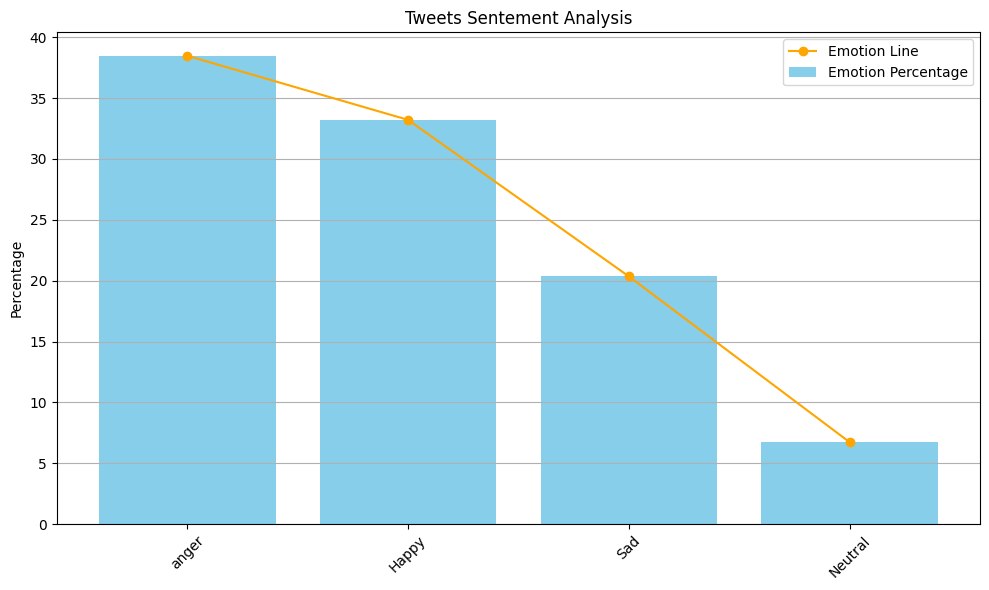

In [32]:
import matplotlib.pyplot as plt


result_df=result_df.reset_index()


plt.figure(figsize=(10, 6))
plt.bar(result_df['Label'], result_df['percentage'], color='skyblue', label='Emotion Percentage')
plt.ylabel('Percentage')
plt.title('Tweets Sentement Analysis')
plt.xticks(rotation=45)

plt.plot(result_df['Label'], result_df['percentage'], color='orange', marker='o', label='Emotion Line')

plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()